In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("f1_data_cleaned.csv")
print("✅ F1 dataset loaded successfully!\n")
print(df.head())

✅ F1 dataset loaded successfully!

            Driver          Team  Races  Wins  Podiums  Poles  Fastest Laps  \
0   Max Verstappen      Red Bull     22    12       18     10             8   
1      Liam Lawson      Red Bull     22     1        5      1             0   
2     Yuki Tsunoda  Racing Bulls     22     0        3      0             1   
3  Charles Leclerc       Ferrari     22     3       11      6             3   
4   Lewis Hamilton       Ferrari     22     2       10      5             2   

   Win Rate (%)  Podium Rate (%)  Performance Index  Winning Probability (%)  
0     54.545455        81.818182          59.072727                24.186704  
1      4.545455        22.727273           9.645455                 3.949230  
2      0.000000        13.636364           4.190909                 1.715923  
3     13.636364        50.000000          24.081818                 9.860046  
4      9.090909        45.454545          19.790909                 8.103179  


C:\Users\Sujanya Sailwal\OneDrive\Documents\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


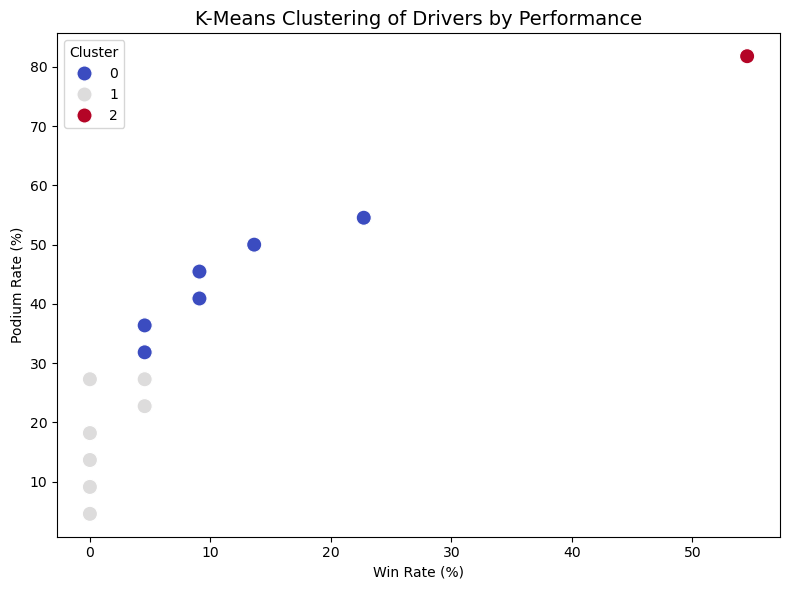

In [3]:
features = df[["Win Rate (%)", "Podium Rate (%)"]]
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(features)

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="Win Rate (%)",
    y="Podium Rate (%)",
    hue="Cluster",
    palette="coolwarm",
    s=120
)
plt.title("K-Means Clustering of Drivers by Performance", fontsize=14)
plt.xlabel("Win Rate (%)")
plt.ylabel("Podium Rate (%)")
plt.legend(title="Cluster", loc="best")
plt.tight_layout()
plt.show()

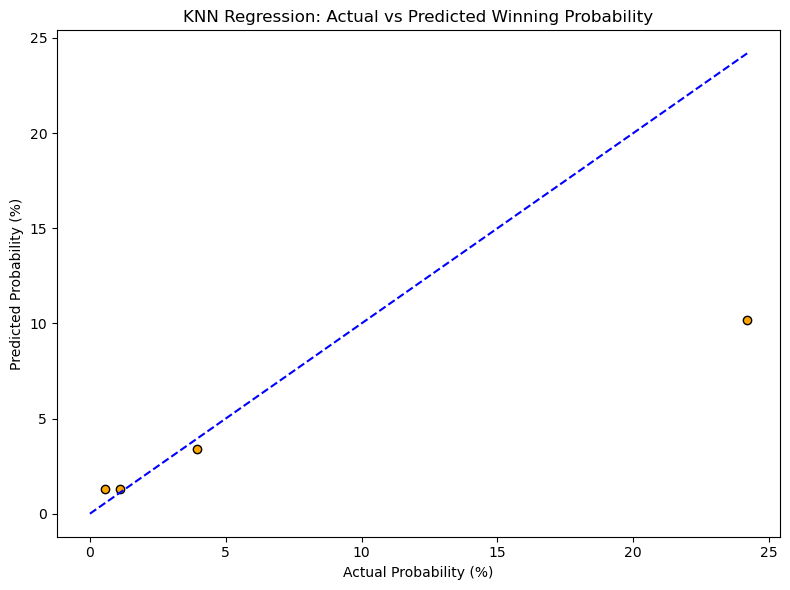

KNN Regression R² Score: 0.481


In [4]:
X = df[["Win Rate (%)", "Podium Rate (%)", "Poles", "Fastest Laps"]]
y = df["Winning Probability (%)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_knn, color="orange", edgecolor="black")
plt.plot([0, max(y_test)], [0, max(y_test)], color="blue", linestyle="--")
plt.xlabel("Actual Probability (%)")
plt.ylabel("Predicted Probability (%)")
plt.title("KNN Regression: Actual vs Predicted Winning Probability")
plt.tight_layout()
plt.show()

print(f"KNN Regression R² Score: {r2_score(y_test, y_pred_knn):.3f}")

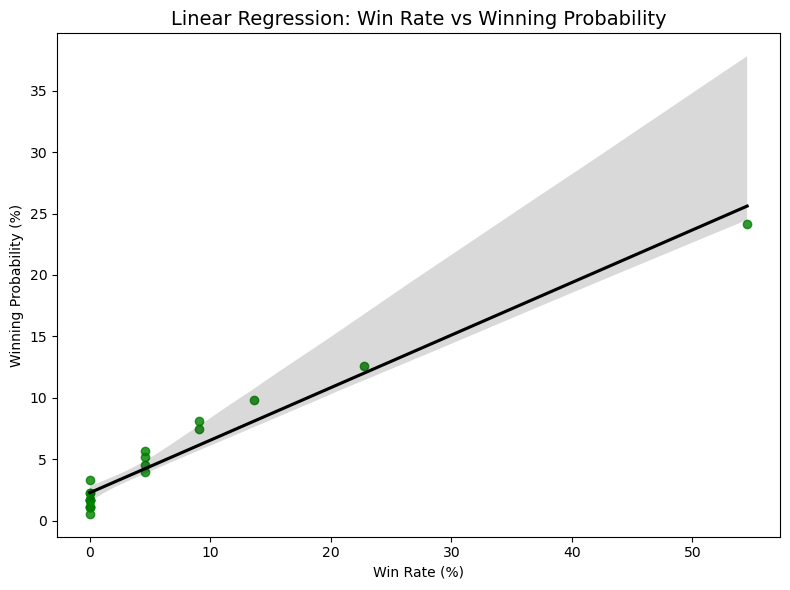

Linear Regression R² Score: 0.960


In [5]:
X_lin = df[["Win Rate (%)"]]
y_lin = df["Winning Probability (%)"]

reg = LinearRegression()
reg.fit(X_lin, y_lin)
y_pred_lin = reg.predict(X_lin)

plt.figure(figsize=(8,6))
sns.regplot(x="Win Rate (%)", y="Winning Probability (%)", data=df, color="green", line_kws={"color":"black"})
plt.title("Linear Regression: Win Rate vs Winning Probability", fontsize=14)
plt.tight_layout()
plt.show()

print(f"Linear Regression R² Score: {r2_score(y_lin, y_pred_lin):.3f}")

C:\Users\Sujanya Sailwal\AppData\Local\Temp\ipykernel_8640\2405844274.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_avg.values, y=team_avg.index, palette="viridis")


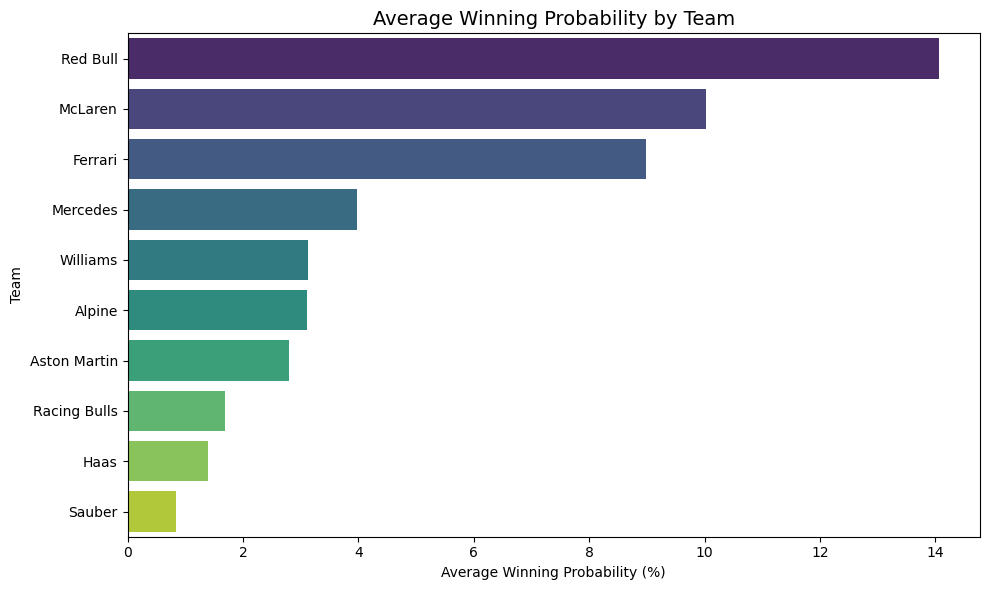

In [6]:
team_avg = df.groupby("Team")["Winning Probability (%)"].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=team_avg.values, y=team_avg.index, palette="viridis")
plt.title("Average Winning Probability by Team", fontsize=14)
plt.xlabel("Average Winning Probability (%)")
plt.ylabel("Team")
plt.tight_layout()
plt.show()

C:\Users\Sujanya Sailwal\AppData\Local\Temp\ipykernel_8640\4267352506.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Winning Probability (%)", y="Driver", data=top5, palette="magma")


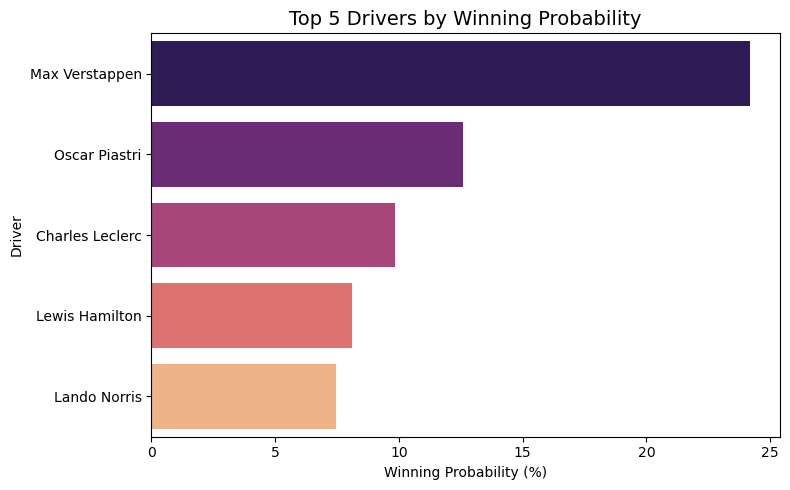


🏁 AIML-Based F1 Performance Analysis Completed Successfully!


In [7]:
top5 = df.sort_values(by="Winning Probability (%)", ascending=False).head(5)
plt.figure(figsize=(8,5))
sns.barplot(x="Winning Probability (%)", y="Driver", data=top5, palette="magma")
plt.title("Top 5 Drivers by Winning Probability", fontsize=14)
plt.tight_layout()
plt.show()

print("\n🏁 AIML-Based F1 Performance Analysis Completed Successfully!")